# ***Stable Diffusion 1.5***                                                          
**" Diffusion is still alive in Colab " -LBG**

# **Dependancies takes a while to setup dont panic just relax😊**

In [ ]:
# Skip if its your second time using Sd from Alive_Sd.ipynb

!pip install transformers diffusers accelerate
!pip install xformers # for memory management

# **For Text to Image gernation 🗨️_📷**






In [ ]:
'''
You can change "model_id" for your custom model just search on google your
model name  with last word "hugging face". copy model "model_id" from  huggingface site given example
code.

'''

from  diffusers import AutoPipelineForText2Image  # importing text to img pipeline
from google.colab import files   #some other imports (usefull)
import torch
import random
import matplotlib.pyplot as plt
import matplotlib.image as render

model_id = "emilianJR/epiCRealism"     # from huggingface sample code (Model)

pipe = AutoPipelineForText2Image.from_pretrained(

        # for gpu ⬇️
        model_id, torch_dtype=torch.float16, use_safetensors=True, safety_checker = None, requires_safety_checker = False

        # for cpu ⬇️
        # model_id, use_safetensors=True, safety_checker = None, requires_safety_checker = False
)


# efficent only for gpu ⬇️
pipe.enable_xformers_memory_efficient_attention()

pipe = pipe.to("cuda") # set "cpu" for cpu and "cuda" for gpu

# **Enter Positive and Negative Prompts Here ⬇️**

In [ ]:
# NOTE: NSFW filter is off by defult be alert !!!

prompts = "dog sitting on (bed)++"
negative = "blurry, bad_quality, worst_quality, bad_anotomy, extra_fingures, low_resolution"

# **Image Gernation With Custom Properties ☸️🛞**

  0%|          | 0/50 [00:00<?, ?it/s]

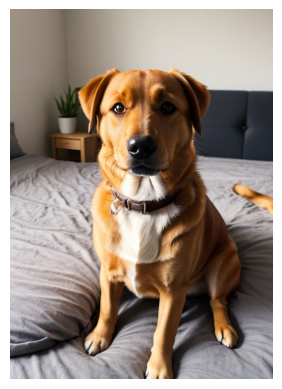

Download Image TYPE YES: no
image is saved in /content/dog sitting on (bed)++409.png


In [ ]:
image = pipe(

             prompt = prompts,
             negative_prompt = negative,

             # you can change the below properties as per your wish ⬇️⬇️

             guidance_scale=7,         # how much image will close to prompt.
             num_inference_steps=50,   # higher value more quality but slow image gernations.
             height=720,
             weight=512,               # defult 512x512, for sdxl use 1024x1024

            ).images[0]

# code for showing and downloading gernated image.
imgName = f'{prompts}{random.randint(0,9999)}.png'
image = image.save(imgName)
output = render.imread(imgName)
plt.imshow(output)
plt.axis('off')         # to hide the graph axis (x & y)
plt.show()              # render img

usr = str(input("Download Image TYPE YES: "))
usr.lower()
if usr == "yes":
  files.download(imgName)
else:
  print(f"image is saved in /content/{imgName}")

# **More Information Here -:**


--> For further learning Stable Diffusion via code here you can Start from:

https://huggingface.co/docs/diffusers/en/using-diffusers/conditional_image_generation


**Future Updates:**

--> Stable Diffusion XL


---


--> Img to Img


---


--> Inpainting


---


--> MaskEditor for Inpainting


---


--> Loars


---


--> Face Warps


---


--> Control Net


---




***VERSION 1.0***